[*********************100%***********************]  1 of 1 completed


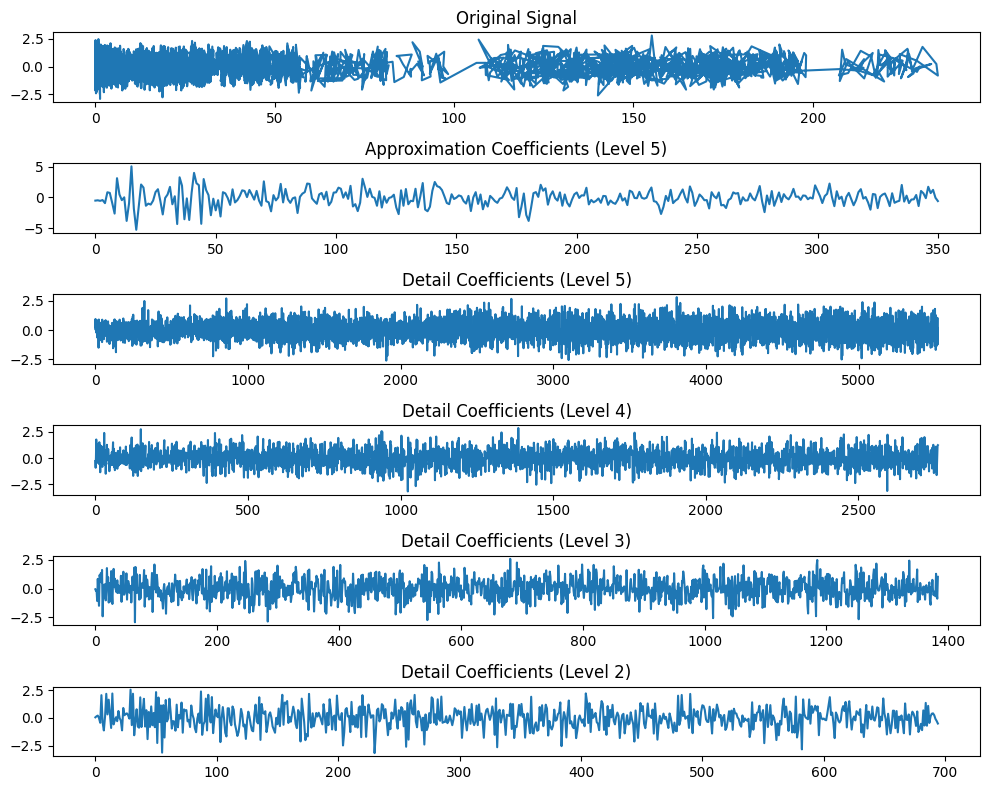

In [3]:
"""# Install pywt if you don't have it already
# !pip install pywt

import pywt
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
df= yf.download('AAPL')
t = df['Close'].values
# Generate a sample signal (e.g., sine wave with some noise)
#t = np.linspace(0, 1, num=400)
signal = np.sin(2 * np.pi * 30 * t) + np.random.randn(len(t)) * 0.5  # 30 Hz sine wave with noise

# Perform Discrete Wavelet Transform (DWT)
wavelet = 'db4'  # Daubechies wavelet of order 4
coeffs = pywt.wavedec(signal, wavelet, level=5)

# `coeffs` contains the approximation and detail coefficients
# Approximation coefficients (low-frequency components)
cA5 = coeffs[0]

# Detail coefficients (high-frequency components)
cD1, cD2, cD3, cD4, cD5 = coeffs[1:]

# Plot original signal and wavelet coefficients
plt.figure(figsize=(10, 8))

# Original signal
plt.subplot(6, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

# Approximation coefficients (low-frequency part)
plt.subplot(6, 1, 2)
plt.plot(cA5)
plt.title('Approximation Coefficients (Level 5)')

# Detail coefficients (high-frequency parts)
plt.subplot(6, 1, 3)
plt.plot(cD5)
plt.title('Detail Coefficients (Level 5)')

plt.subplot(6, 1, 4)
plt.plot(cD4)
plt.title('Detail Coefficients (Level 4)')

plt.subplot(6, 1, 5)
plt.plot(cD3)
plt.title('Detail Coefficients (Level 3)')

plt.subplot(6, 1, 6)
plt.plot(cD2)
plt.title('Detail Coefficients (Level 2)')

plt.tight_layout()
plt.show()
"""

[*********************100%***********************]  1 of 1 completed


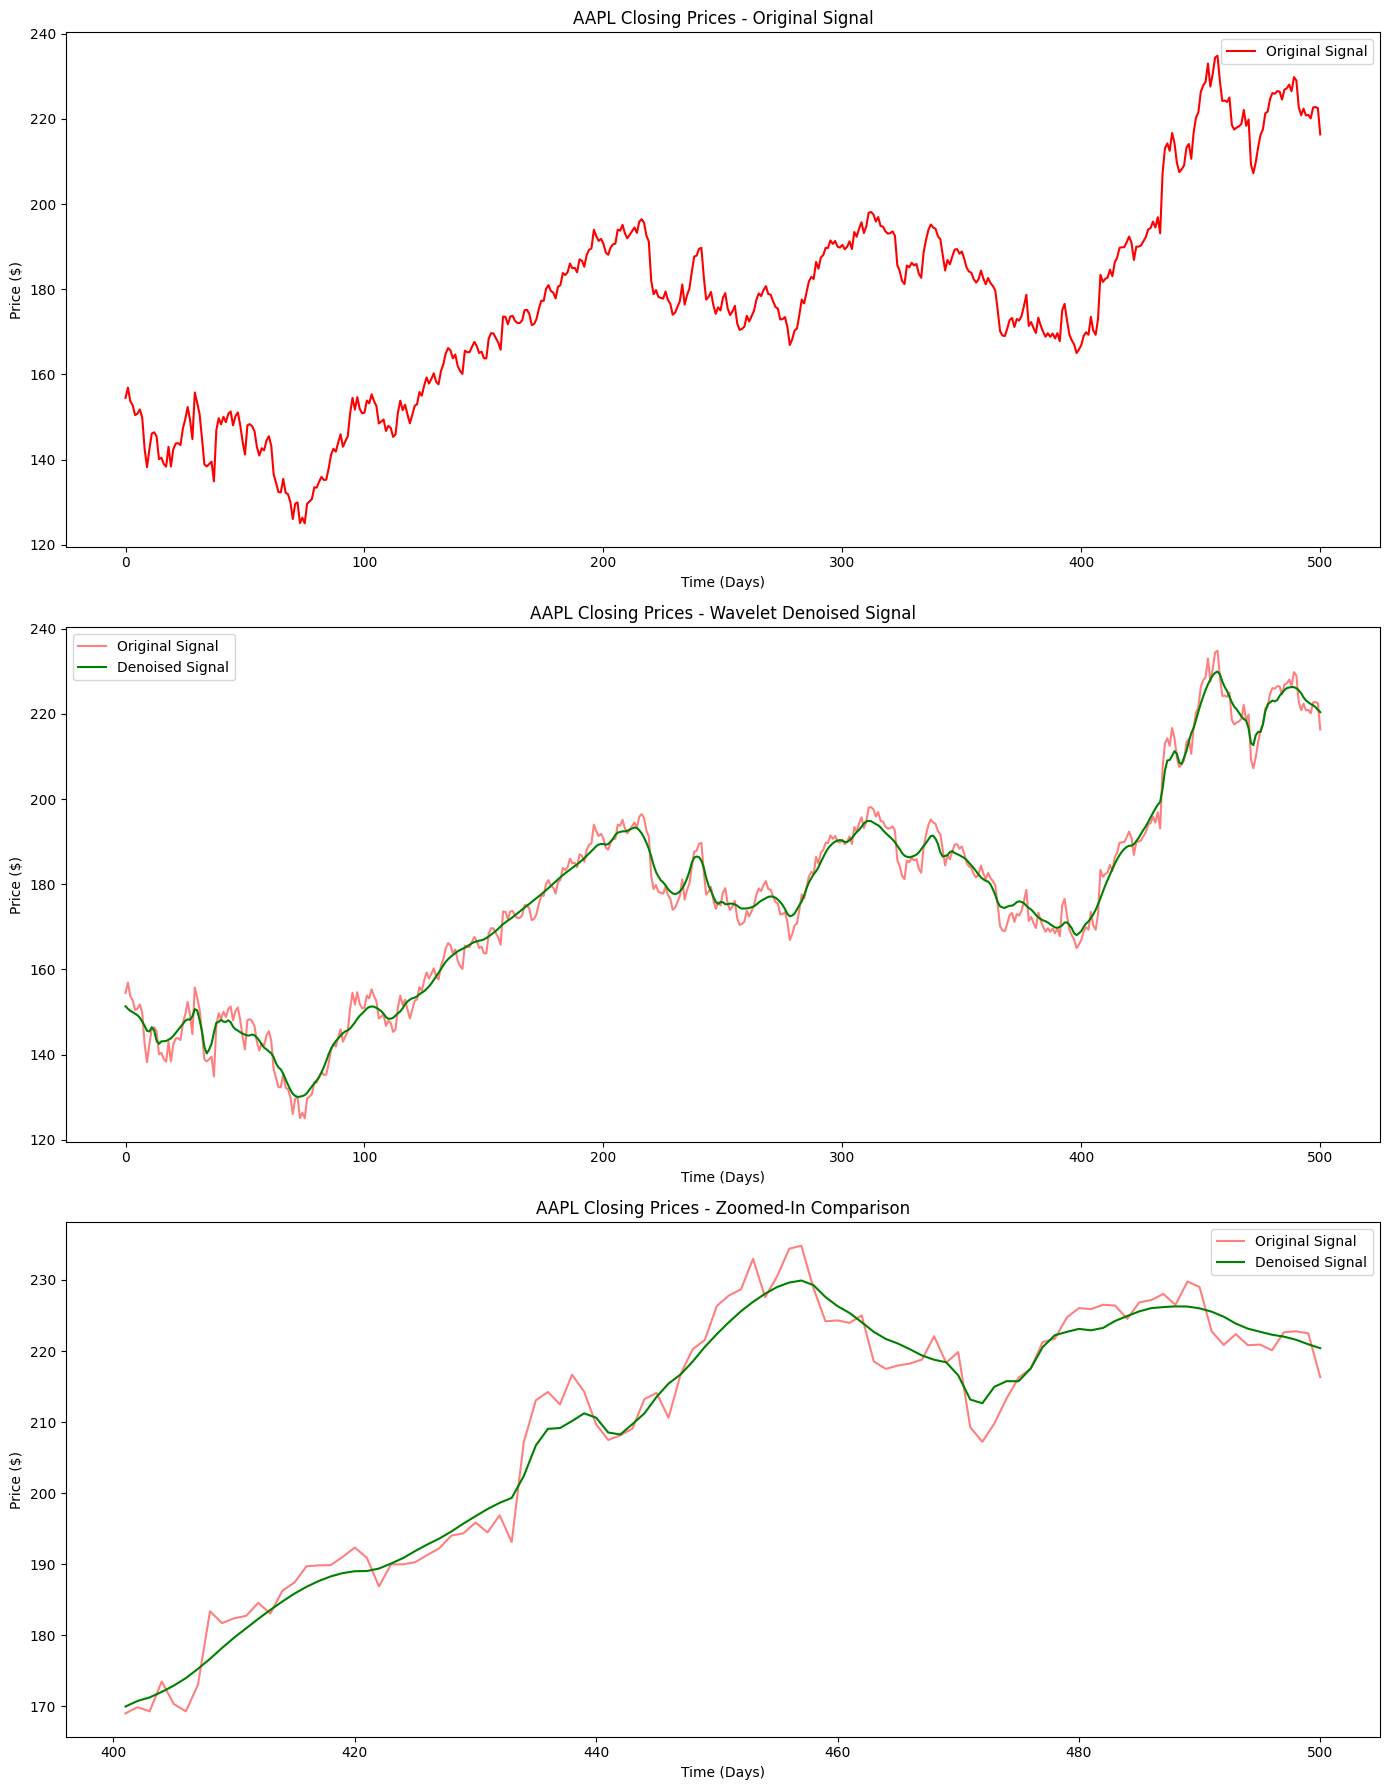

Mean Squared Error: 7.0840
Mean Absolute Error: 2.1582
R2 Score: 0.9883


In [12]:
import yfinance as yf
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Fetch Historical Stock Data
ticker = 'AAPL'
period = '2y'
stock_data = yf.download(ticker, period=period)

# 2. Prepare the Data
close_prices = stock_data['Close']
signal = close_prices.values
time = np.arange(len(signal))

# 3. Wavelet-Based Denoising
wavelet = 'db4'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(signal)))
denoised_coeffs = coeffs.copy()
denoised_coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in denoised_coeffs[1:]]
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
denoised_signal = denoised_signal[:len(signal)]

# 4. Zoomed-In Comparison Range
zoom_start = len(signal) - 100
zoom_end = len(signal)

# 5. Create Subplots for Visualization
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Original Signal
axs[0].plot(time, signal, label='Original Signal', color='red')
axs[0].set_title(f'{ticker} Closing Prices - Original Signal')
axs[0].set_xlabel('Time (Days)')
axs[0].set_ylabel('Price ($)')
axs[0].legend()

# Plot 2: Denoised Signal
axs[1].plot(time, signal, label='Original Signal', color='red', alpha=0.5)
axs[1].plot(time, denoised_signal, label='Denoised Signal', color='green')
axs[1].set_title(f'{ticker} Closing Prices - Wavelet Denoised Signal')
axs[1].set_xlabel('Time (Days)')
axs[1].set_ylabel('Price ($)')
axs[1].legend()

# Plot 3: Zoomed-In Comparison
axs[2].plot(time[zoom_start:zoom_end], signal[zoom_start:zoom_end], label='Original Signal', color='red', alpha=0.5)
axs[2].plot(time[zoom_start:zoom_end], denoised_signal[zoom_start:zoom_end], label='Denoised Signal', color='green')
axs[2].set_title(f'{ticker} Closing Prices - Zoomed-In Comparison')
axs[2].set_xlabel('Time (Days)')
axs[2].set_ylabel('Price ($)')
axs[2].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# 6. Evaluate the Denoising Effect
mse = mean_squared_error(signal, denoised_signal)
mae = mean_absolute_error(signal, denoised_signal)
r2 = r2_score(signal, denoised_signal)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


[*********************100%***********************]  1 of 1 completed


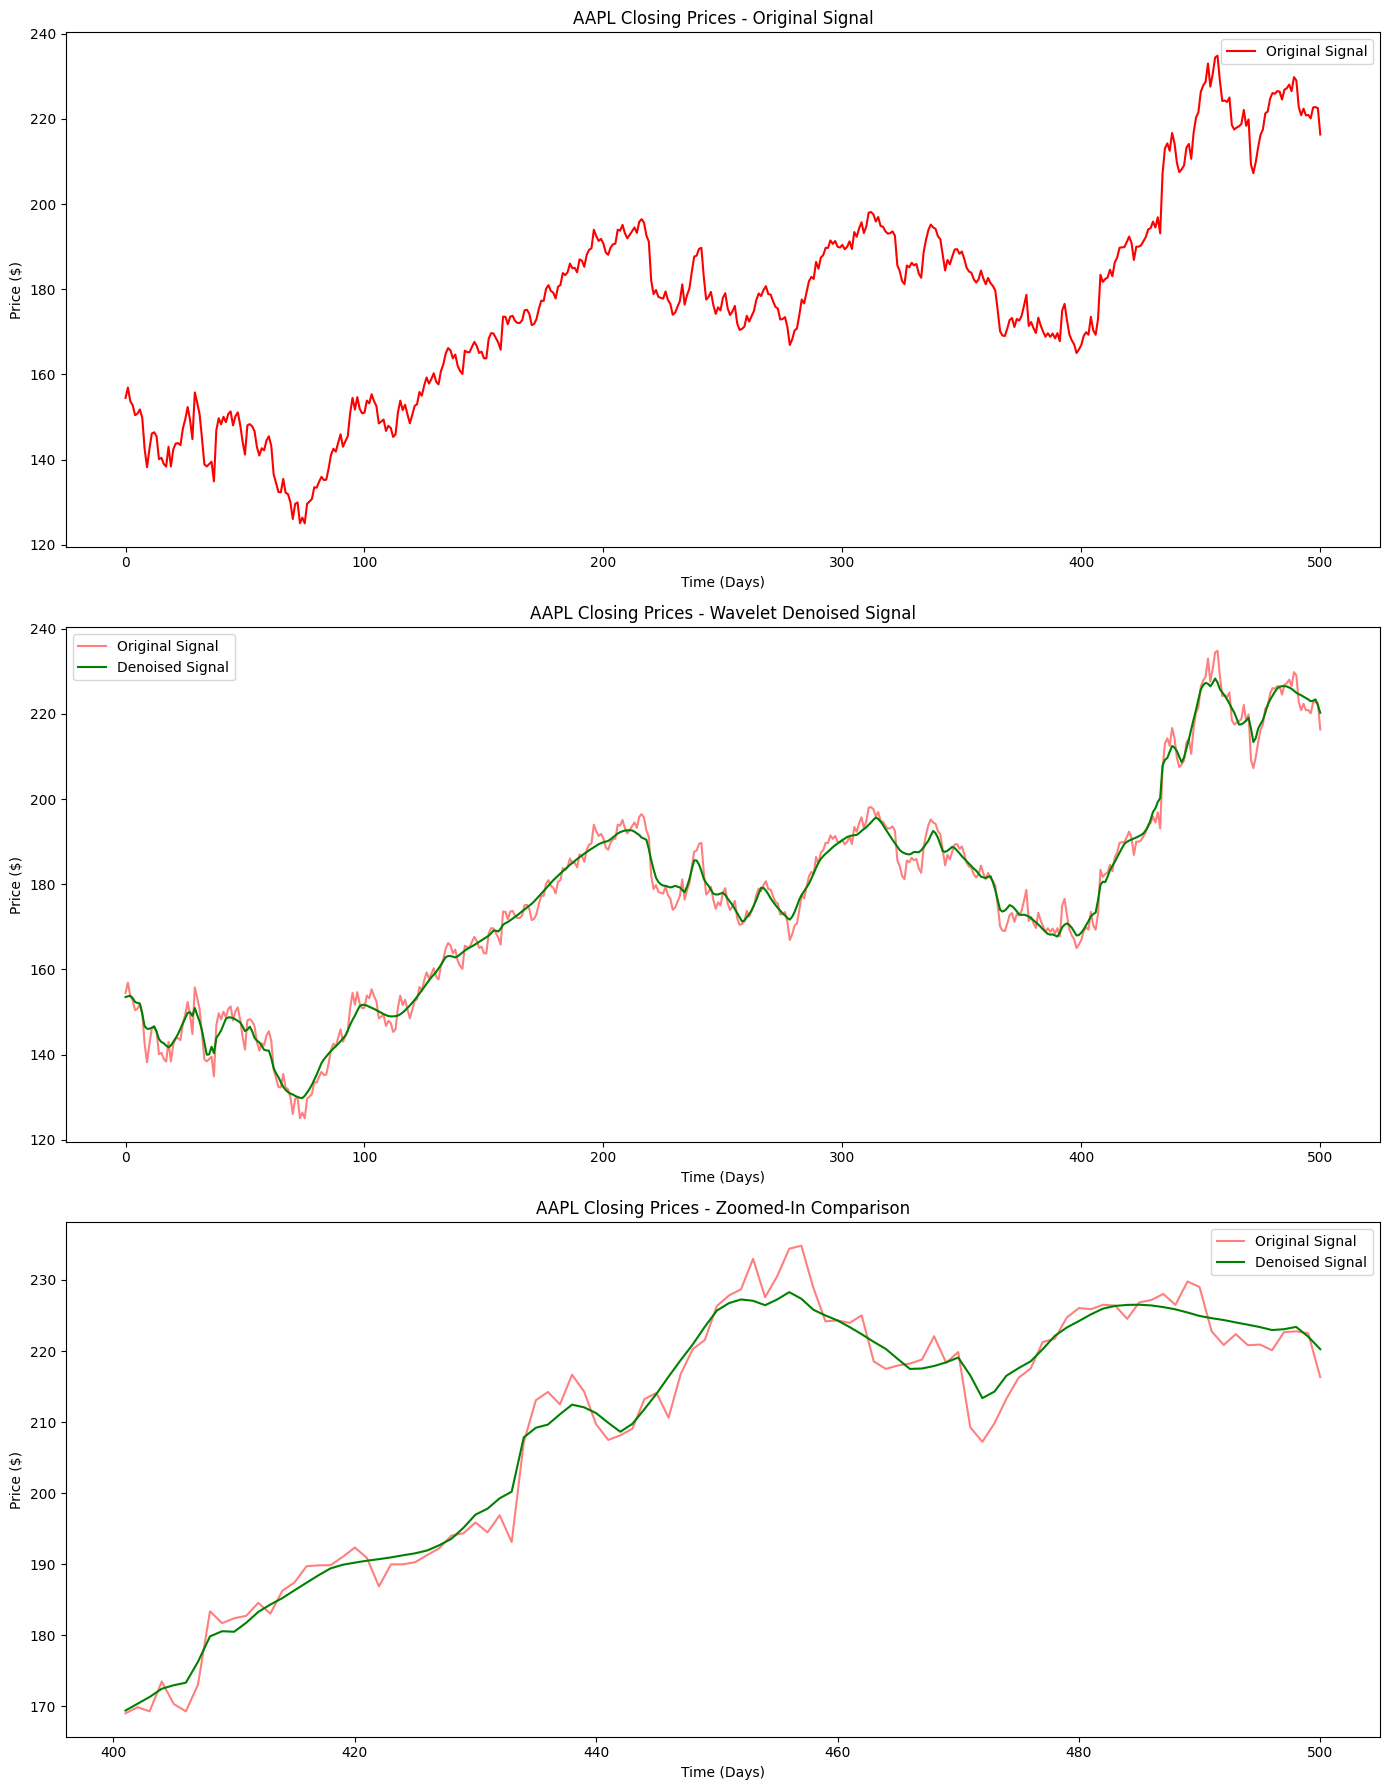

Mean Squared Error: 5.9556
Mean Absolute Error: 1.9159
R2 Score: 0.9902


In [11]:
import yfinance as yf
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Fetch Historical Stock Data
ticker = 'AAPL'
period = '2y'
stock_data = yf.download(ticker, period=period)

# 2. Prepare the Data
close_prices = stock_data['Close']
signal = close_prices.values
time = np.arange(len(signal))

# 3. Wavelet-Based Denoising
wavelet = 'sym4'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(signal)))
denoised_coeffs = coeffs.copy()
denoised_coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in denoised_coeffs[1:]]
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
denoised_signal = denoised_signal[:len(signal)]

# 4. Zoomed-In Comparison Range
zoom_start = len(signal) - 100
zoom_end = len(signal)

# 5. Create Subplots for Visualization
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Original Signal
axs[0].plot(time, signal, label='Original Signal', color='red')
axs[0].set_title(f'{ticker} Closing Prices - Original Signal')
axs[0].set_xlabel('Time (Days)')
axs[0].set_ylabel('Price ($)')
axs[0].legend()

# Plot 2: Denoised Signal
axs[1].plot(time, signal, label='Original Signal', color='red', alpha=0.5)
axs[1].plot(time, denoised_signal, label='Denoised Signal', color='green')
axs[1].set_title(f'{ticker} Closing Prices - Wavelet Denoised Signal')
axs[1].set_xlabel('Time (Days)')
axs[1].set_ylabel('Price ($)')
axs[1].legend()

# Plot 3: Zoomed-In Comparison
axs[2].plot(time[zoom_start:zoom_end], signal[zoom_start:zoom_end], label='Original Signal', color='red', alpha=0.5)
axs[2].plot(time[zoom_start:zoom_end], denoised_signal[zoom_start:zoom_end], label='Denoised Signal', color='green')
axs[2].set_title(f'{ticker} Closing Prices - Zoomed-In Comparison')
axs[2].set_xlabel('Time (Days)')
axs[2].set_ylabel('Price ($)')
axs[2].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# 6. Evaluate the Denoising Effect
mse = mean_squared_error(signal, denoised_signal)
mae = mean_absolute_error(signal, denoised_signal)
r2 = r2_score(signal, denoised_signal)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


[*********************100%***********************]  1 of 1 completed


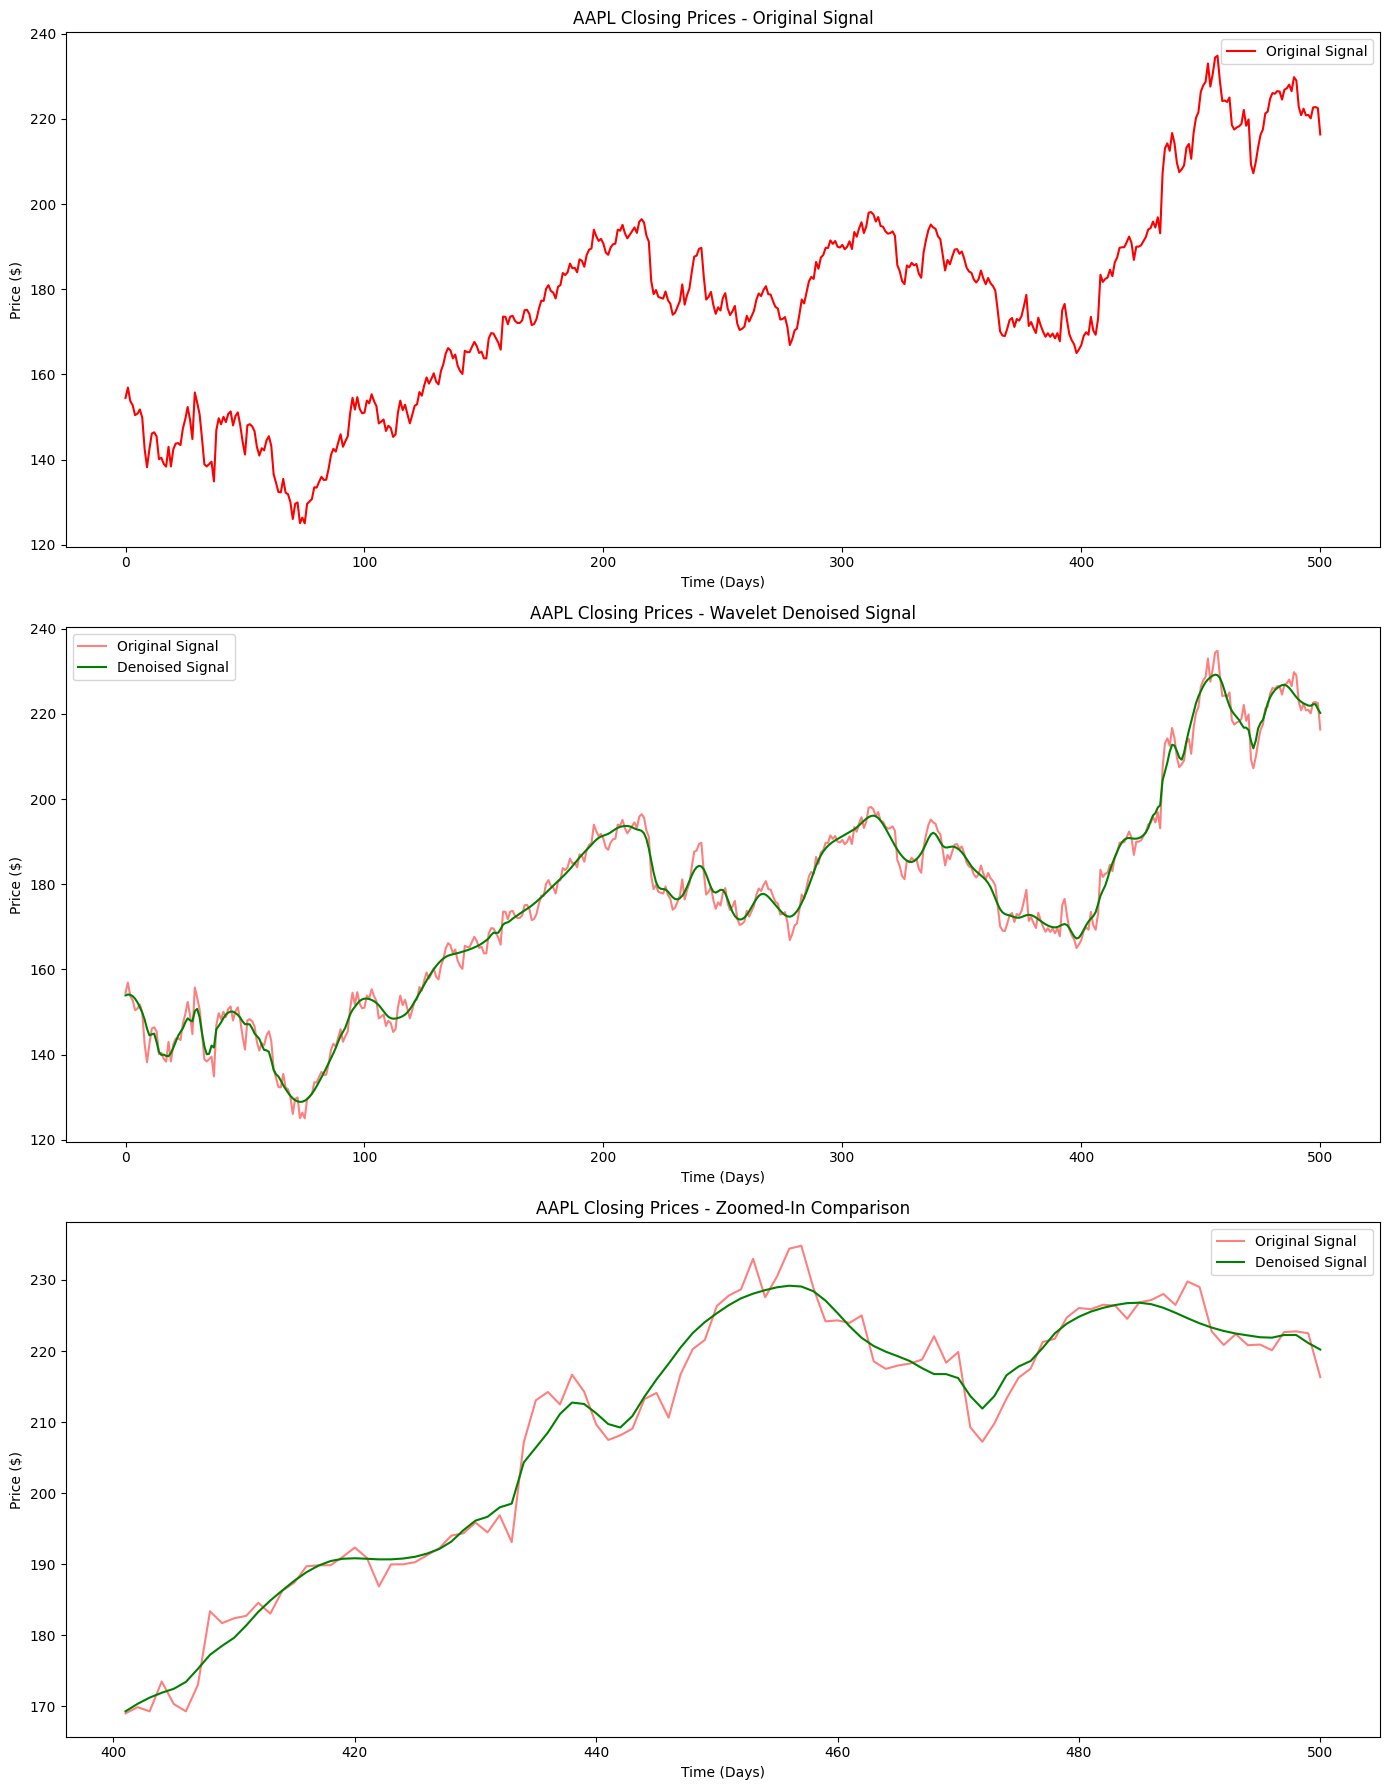

Mean Squared Error: 5.1595
Mean Absolute Error: 1.7559
R2 Score: 0.9915


In [10]:
import yfinance as yf
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Fetch Historical Stock Data
ticker = 'AAPL'
period = '2y'
stock_data = yf.download(ticker, period=period)

# 2. Prepare the Data
close_prices = stock_data['Close']
signal = close_prices.values
time = np.arange(len(signal))

# 3. Wavelet-Based Denoising
wavelet = 'coif5'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(signal)))
denoised_coeffs = coeffs.copy()
denoised_coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in denoised_coeffs[1:]]
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
denoised_signal = denoised_signal[:len(signal)]

# 4. Zoomed-In Comparison Range
zoom_start = len(signal) - 100
zoom_end = len(signal)

# 5. Create Subplots for Visualization
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Original Signal
axs[0].plot(time, signal, label='Original Signal', color='red')
axs[0].set_title(f'{ticker} Closing Prices - Original Signal')
axs[0].set_xlabel('Time (Days)')
axs[0].set_ylabel('Price ($)')
axs[0].legend()

# Plot 2: Denoised Signal
axs[1].plot(time, signal, label='Original Signal', color='red', alpha=0.5)
axs[1].plot(time, denoised_signal, label='Denoised Signal', color='green')
axs[1].set_title(f'{ticker} Closing Prices - Wavelet Denoised Signal')
axs[1].set_xlabel('Time (Days)')
axs[1].set_ylabel('Price ($)')
axs[1].legend()

# Plot 3: Zoomed-In Comparison
axs[2].plot(time[zoom_start:zoom_end], signal[zoom_start:zoom_end], label='Original Signal', color='red', alpha=0.5)
axs[2].plot(time[zoom_start:zoom_end], denoised_signal[zoom_start:zoom_end], label='Denoised Signal', color='green')
axs[2].set_title(f'{ticker} Closing Prices - Zoomed-In Comparison')
axs[2].set_xlabel('Time (Days)')
axs[2].set_ylabel('Price ($)')
axs[2].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# 6. Evaluate the Denoising Effect
mse = mean_squared_error(signal, denoised_signal)
mae = mean_absolute_error(signal, denoised_signal)
r2 = r2_score(signal, denoised_signal)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


[*********************100%***********************]  1 of 1 completed


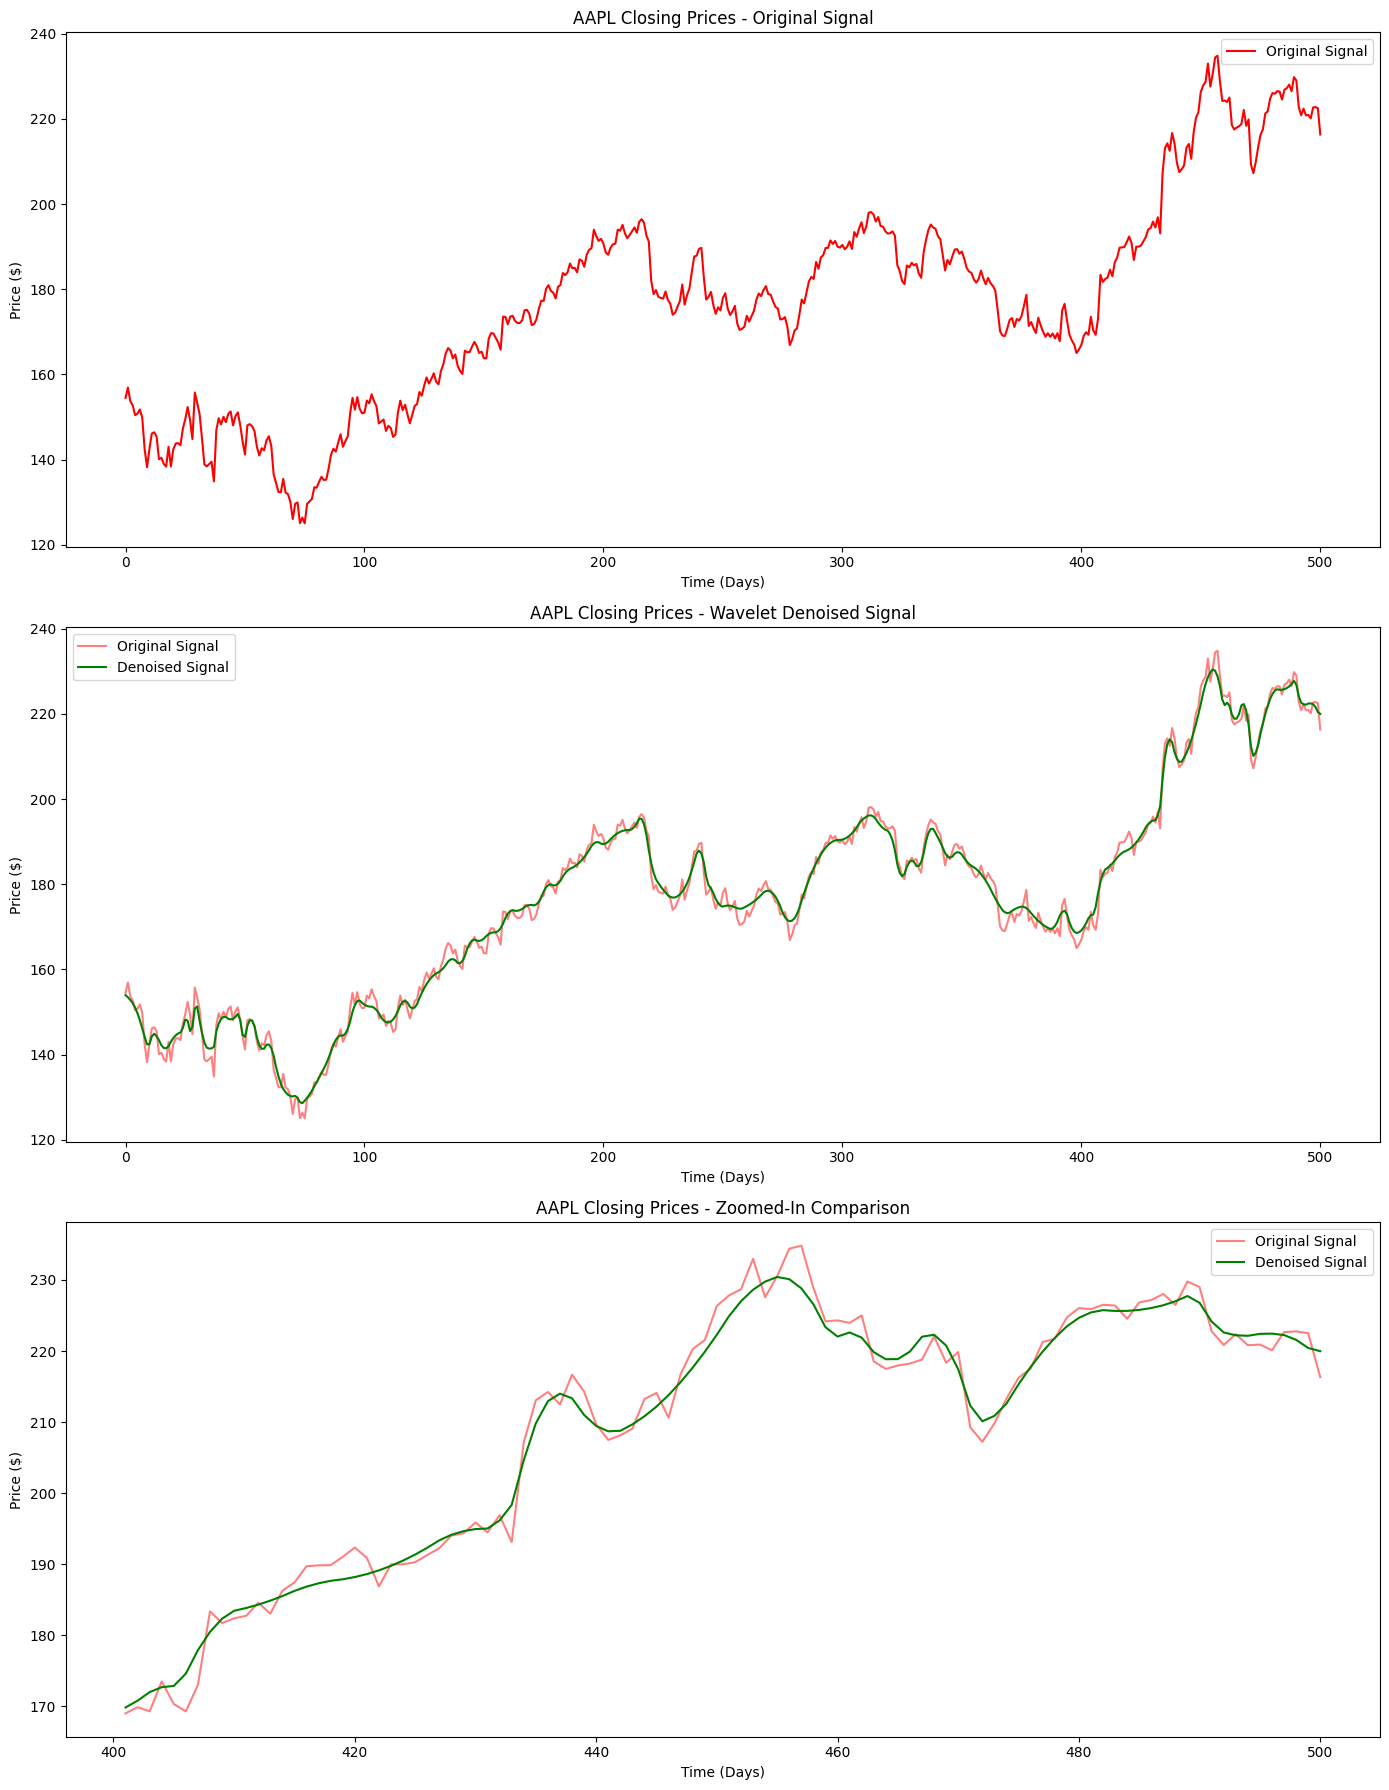

Mean Squared Error: 4.0785
Mean Absolute Error: 1.6217
R2 Score: 0.9933


In [9]:
import yfinance as yf
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Fetch Historical Stock Data
ticker = 'AAPL'
period = '2y'
stock_data = yf.download(ticker, period=period)

# 2. Prepare the Data
close_prices = stock_data['Close']
signal = close_prices.values
time = np.arange(len(signal))

# 3. Wavelet-Based Denoising
wavelet = 'bior3.3'
max_level = pywt.dwt_max_level(len(signal), pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(signal, wavelet, level=max_level)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(signal)))
denoised_coeffs = coeffs.copy()
denoised_coeffs[1:] = [pywt.threshold(c, value=threshold, mode='soft') for c in denoised_coeffs[1:]]
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
denoised_signal = denoised_signal[:len(signal)]

# 4. Zoomed-In Comparison Range
zoom_start = len(signal) - 100
zoom_end = len(signal)

# 5. Create Subplots for Visualization
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Original Signal
axs[0].plot(time, signal, label='Original Signal', color='red')
axs[0].set_title(f'{ticker} Closing Prices - Original Signal')
axs[0].set_xlabel('Time (Days)')
axs[0].set_ylabel('Price ($)')
axs[0].legend()

# Plot 2: Denoised Signal
axs[1].plot(time, signal, label='Original Signal', color='red', alpha=0.5)
axs[1].plot(time, denoised_signal, label='Denoised Signal', color='green')
axs[1].set_title(f'{ticker} Closing Prices - Wavelet Denoised Signal')
axs[1].set_xlabel('Time (Days)')
axs[1].set_ylabel('Price ($)')
axs[1].legend()

# Plot 3: Zoomed-In Comparison
axs[2].plot(time[zoom_start:zoom_end], signal[zoom_start:zoom_end], label='Original Signal', color='red', alpha=0.5)
axs[2].plot(time[zoom_start:zoom_end], denoised_signal[zoom_start:zoom_end], label='Denoised Signal', color='green')
axs[2].set_title(f'{ticker} Closing Prices - Zoomed-In Comparison')
axs[2].set_xlabel('Time (Days)')
axs[2].set_ylabel('Price ($)')
axs[2].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

# 6. Evaluate the Denoising Effect
mse = mean_squared_error(signal, denoised_signal)
mae = mean_absolute_error(signal, denoised_signal)
r2 = r2_score(signal, denoised_signal)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
